# Install

In [1]:
#!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

In [1]:
import os
import cv2
import imutils
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [2]:
import matplotlib.patches as patches
from imutils import paths

In [3]:
#!pip install -r requirements.txt

# Datasets

Download the official facades datasets with:

-   `bash ./datasets/download_pix2pix_dataset.sh facades`

Or use your own dataset by creating the appropriate folders and adding in the images. Follow the instructions [here](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix/blob/master/docs/datasets.md#pix2pix-datasets).

In [4]:
#!bash ./datasets/download_pix2pix_dataset.sh facades

In [6]:
# import torch
# torch.cuda.empty_cache()

# Training

-   `python train.py --dataroot ./datasets/facades --name facades_pix2pix --model pix2pix --direction AtoB`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. Add `--direction BtoA` if you want to train a model to transfrom from class B to A.

In [3]:
!python train.py --dataroot ./datasets/facades --name facades_pix2pix --model pix2pix --direction AtoB --continue_train

^C


# Testing

-   `python test.py --dataroot ./datasets/facades --direction AtoB --model pix2pix --name facades_pix2pix`

Change the `--dataroot`, `--name`, and `--direction` to be consistent with your trained model's configuration and how you want to transform images.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> Note that we specified --direction AtoB as Facades dataset's A to B direction is photos to labels.

> If you would like to apply a pre-trained model to a collection of input images (rather than image pairs), please use --model test option. See ./scripts/test_single.sh for how to apply a model to Facade images (stored in the directory facades/testA).

In [8]:
# !ls checkpoints/

In [3]:
import re
def get_numbers_from_filename(filename):
    return re.search(r'\d+', filename).group(0)

In [4]:
this_path = "./datasets/facades/"
imgPaths1 = sorted(list(paths.list_images(this_path + "A")))
imgPaths2 = sorted(list(paths.list_images(this_path + "B")))
imgs = []
img1 = []
img2 = []
j = 469
for imgPath in imgPaths1:
    img = cv2.imread(imgPath)
    img1.append(img)
for imgPath in imgPaths2:
    img = cv2.imread(imgPath)
    img2.append(img)
for i in range(len(img1)):
    imgs.append(img1[i])
    imgs.append(img2[i])
    image = cv2.hconcat([imgs[0],imgs[1]])
#     cv2.imshow('image',image)
#     cv2.waitKey()
#     cv2.destroyAllWindows()
    cv2.imwrite(this_path + 'train' + '/img_'+ str(j) + '.jpg', image)
    j = j+1
    imgs = []

In [5]:
imgPaths = sorted(list(paths.list_images("./datasets/facades/detect_car_retained/")))
imgs = []
i = 0
for imgPath in imgPaths:
    img = cv2.imread(imgPath)
    imgs.append(img)
    imgs.append(img)
    image = cv2.hconcat([imgs[0],imgs[1]])
#     cv2.imshow('image',image)
#     cv2.waitKey()
#     cv2.destroyAllWindows()
    cv2.imwrite('./datasets/facades/test/' + '/gsv'+ str(i) + '.jpg', image)
    i = i+1
    imgs = []

In [ ]:
!python test.py --dataroot ./datasets/facades --direction AtoB --model pix2pix --name facades_pix2pix --num_test 2141

# Visualize

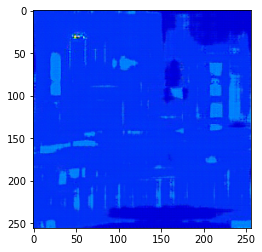

In [13]:
import matplotlib.pyplot as plt

img = plt.imread('./results/facades_pix2pix/test_latest/images/gsv50_fake_B.png')
plt.imshow(img)

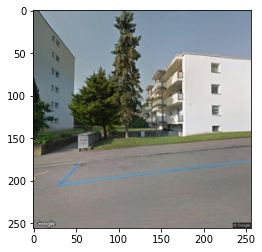

In [15]:
img = plt.imread('./results/facades_pix2pix/test_latest/images/gsv50_real_A.png')
plt.imshow(img)

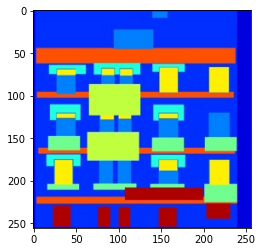

In [14]:
img = plt.imread('./results/facades_pix2pix/test_latest/images/50_real_B.png')
plt.imshow(img)